## DL Part 2-2. CNN : Convolution Neural Network

In [ ]:
# for google colab
%tensorflow_version 2.x

## 1.NumPy Array Image만들기

(120, 120)
(120, 120, 3)


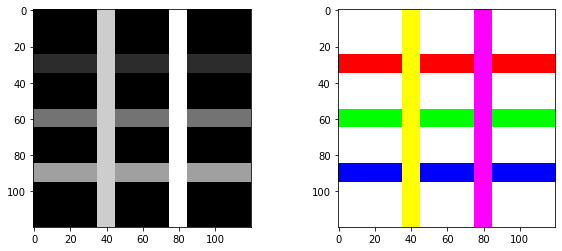

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35, :] = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65, :] = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95, :] = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255      
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]      
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

## 2.Convolution 연산 실습


### 2-01. tf.keras.layers.Conv2D() 사용법

input img: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape: (1, 3, 3, 1)
filter:[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
filltered:
 [[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]]


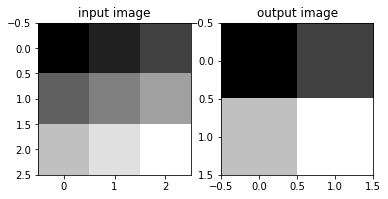

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(f'input img: \n {img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

x = np.float32(img.reshape(1,3,3,1))
print(f'input shape: {x.shape}')

filters = 1
ksize = 2
stride = 1
def kerner_init(shape, dtype):
  filter = tf.constant(1, shape=shape, dtype=dtype)
  print(f'filter:{filter}')
  return filter

conv2d = tf.keras.layers.Conv2D(filters, ksize,
                                kernel_initializer=kerner_init,
                                input_shape=(3,3,1))
fillterd = conv2d(x)
print(f'filltered:\n {fillterd}')
out = fillterd.numpy().reshape(2,2)
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

### 2-02. Conv2D로 엣지 검출

In [ ]:
!wget -O tkv.jpg http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg

--2020-11-15 09:03:49--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44284 (43K) [image/jpeg]
Saving to: ‘tkv.jpg’

tkv.jpg             100%[===================>]  43.25K   113KB/s    in 0.4s    

2020-11-15 09:03:50 (113 KB/s) - ‘tkv.jpg’ saved [44284/44284]



kernel shape:  (3, 3, 1, 2)
(1, 444, 400, 2)


True

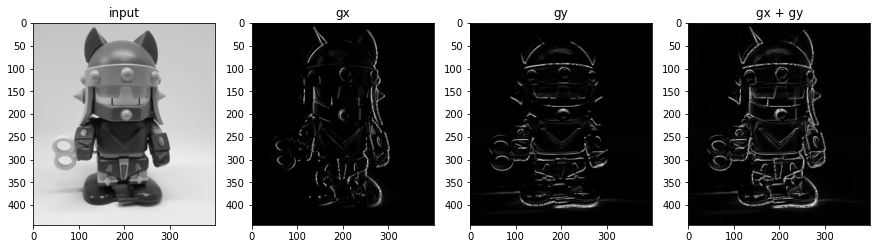

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

def edge_kernel_init(shape, dtype):
  # x 방향 미분 커널 
  gxk = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]]).reshape(3,3,1)
  # y 방향 미분 커널 
  gyk = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]]).reshape(3,3,1)
  kernel = np.stack((gxk, gyk), axis=3)
  print("kernel shape: ", kernel.shape)     
  return tf.constant(kernel, dtype=dtype)

filters=2
ksize = 3
edge_conv = tf.keras.layers.Conv2D(filters, ksize, kernel_initializer=edge_kernel_init,
                                   input_shape=(h,w,1), padding="same", activation='relu')
gxy = edge_conv(x).numpy()
print(gxy.shape)
#gxy[gxy < 0 ]=0  #음수처리, relu와 같은 원리, Conv2D(activation=None)과 비교해 보세요.
gx = gxy[:, :, :, 0].reshape(h,w).astype(np.uint8)
gy = gxy[:,:,:,1].reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

cv2.imwrite('tkv_filtered.jpg', gx+gy)

## 3.MaxPool
#### Pooling을 이용한 특징 축소 사례
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

#### Pooling을 이용한 특징 축소 사례 2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

### 3-01. tf.kears.layers.MaxPool2D 사용법

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


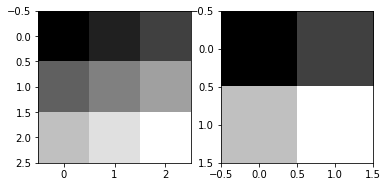

In [ ]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = (2,2) # [2,2] or [1,2,2,1]
strides = 1 # [1,1] or [1,1,1,1]

maxpool = tf.keras.layers.MaxPool2D(ksize, strides, padding='valid')
pooled = maxpool(x).numpy()

print(pooled)
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()

### 3-02. MaxPool을 이용한 특징 검출

(1, 444, 400, 1)
(1, 44, 40, 1)


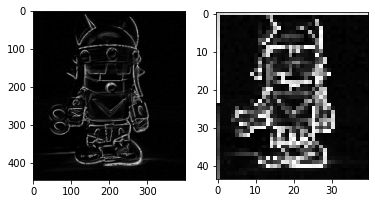

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('tkv_filtered.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

ksize = (5,5)
strieds = 10
pooled = tf.keras.layers.MaxPool2D(ksize, strieds)(x)
pooled = pooled.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

## 4.MNIST 숫자 손글씨 인식

### 4-01. MNIST 숫자 인식을 위한 모델 설계

In [ ]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

### 4-02. LeNet-5을 이용한 MNIST

In [ ]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = make_LeNet(input_shape=(28,28,1))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3230 - accuracy: 0.9009 - val_loss: 0.0877 - val_accuracy: 0.9722
Epoch 2/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.0929 - accuracy: 0.9727 - val_loss: 0.0674 - val_accuracy: 0.9808
Epoch 3/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0519 - val_accuracy: 0.9870
Epoch 4/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0545 - accuracy: 0.9838 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 5/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.0473 - accuracy: 0.9861 - val_loss: 0.0428 - val_accuracy: 0.9888
Epoch 6/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0432 - val_accuracy: 0.9882
Epoch 7/10
55000/55000 [==============================] -

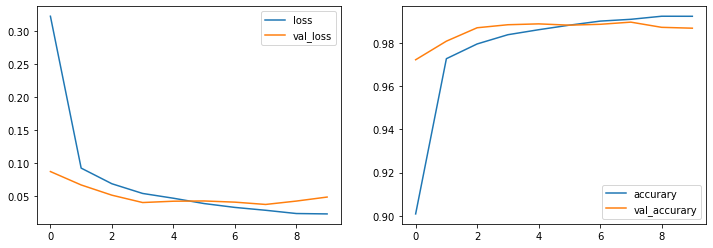

In [ ]:
import matplotlib.pyplot as plt

def drawPlot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label="loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],  label="accurary")
    plt.plot(history.history['val_accuracy'], label="val_accurary")
    plt.legend()
    plt.show()
drawPlot(history)

## 5.Using Pre-trained Model
* VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

IMG_SIZE = 224
vgg16 = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
!wget -O others.zip http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fothers.zip
!unzip others.zip

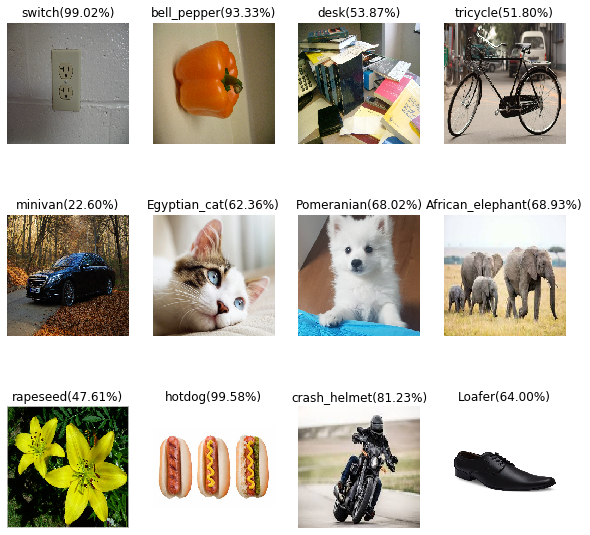

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

test_dir_path = 'others/*.*'
test_paths = glob.glob(test_dir_path)

plt.figure(figsize=(10,10))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)#, dtype=np.uint8)
    img_arr = tf.expand_dims(img_arr, 0)

    pred = vgg16.predict(preprocess_input(img_arr))
    decoded = decode_predictions(pred)[0]
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')
    plt.axis('off')
plt.show()

### 5-01. Transfer Learning
* VGG16 loading for TL


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('conv_base를 동결 전 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 전 학습 가중치 변수 층 수: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('conv_base를 동결 후 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 후 학습 가중치 변수 층 수: 4


### 5-02. Kaggle Dogs vs. Cats     
* https://www.kaggle.com/c/dogs-vs-cats/data
* 설치
    * `!pip install kaggle`

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'jaen11487'
os.environ['KAGGLE_KEY'] = '1e7109f613a54cba533ab49ab46927ff'
!kaggle competitions download -c dogs-vs-cats

#### 5-02-1. Unzip,  Directory 구성


In [ ]:
import zipfile
import os
dir_path = 'cat_dog'

In [ ]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

In [ ]:
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)

#### 5-02-2. 준비된 디렉토리에 파일 복사
* test 디렉토리에 25% 할당

In [ ]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이타, 증식 없슴
train_generator = train_datagen.flow_from_directory(
        os.path.join(dir_path, 'train'), # 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dir_path, 'test'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 18626 images belonging to 2 classes.
Found 6374 images belonging to 2 classes.


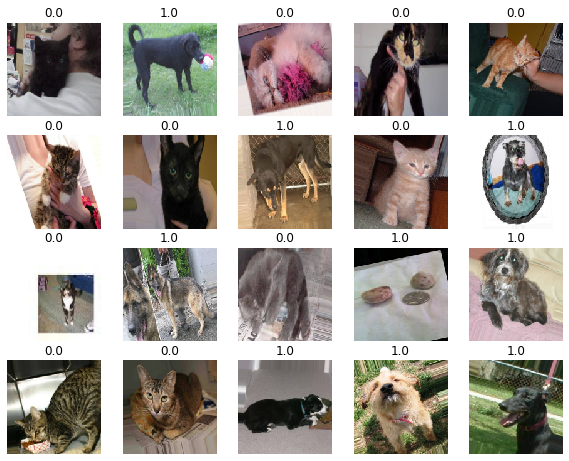

In [ ]:
image_batch, label_batch = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 18626 images belonging to 2 classes.
Found 6374 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 - 23s - loss: 0.5410 - acc: 0.7505 - val_loss: 0.4377 - val_acc: 0.8250
Epoch 2/30
100/100 - 21s - loss: 0.4227 - acc: 0.8170 - val_loss: 0.3641 - val_acc: 0.8530
Epoch 3/30
100/100 - 21s - loss: 0.3615 - acc: 0.8430 - val_loss: 0.3702 - val_acc: 0.8410
Epoch 4/30
100/100 - 21s - loss: 0.3354 - acc: 0.8660 - val_loss: 0.3024 - val_acc: 0.8720
Epoch 5/30
100/100 - 22s - loss: 0.3306 - acc: 0.8575 - val_loss: 0.2858 - val_acc: 0.8790
Epoch 6/30
100/100 - 24s - loss: 0.3118 - acc: 0.8680 - val_loss: 0.2772 - val_acc: 0.8840
Epoch 7/30
100/100 - 23s - loss: 0.3122 - acc: 0.8696 - val_loss: 0.2671 - val_acc: 0.8850
Epoch 8/30
100/100 - 21s - loss: 0.2932 - acc: 0.8725 - val_loss: 0.2603 - val_acc: 0.8850
Epoch 9/30
100/100

In [ ]:
loss_after,accuracy_after = model.evaluate(validation_generator)
print("Test Accuracy:{}".format(accuracy_after))

  ...
    to  
  ['...']
319/319 [==============================] - 42s 131ms/step - loss: 0.2215 - acc: 0.9081
Test Accuracy:0.9080640077590942


In [ ]:
model.save('cats_and_dogs_small_3.h5')

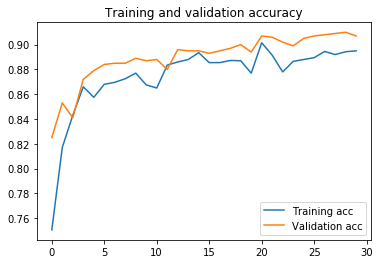

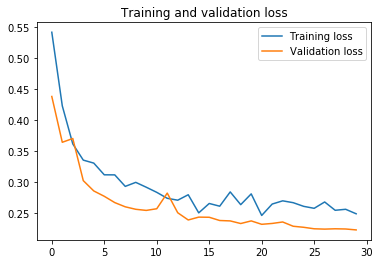

In [ ]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#### 5-02-3. VGGNet 개,고양이 분류 테스트

In [ ]:
!wget -O pet.zip http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fpet.zip
!unzip pet.zip

--2020-11-02 13:27:26--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fpet.zip
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499472 (488K) [application/zip]
Saving to: ‘pet.zip’

pet.zip             100%[===================>] 487.77K   485KB/s    in 1.0s    

2020-11-02 13:27:28 (485 KB/s) - ‘pet.zip’ saved [499472/499472]

Archive:  pet.zip
   creating: pet/
  inflating: pet/dog.jpg             
  inflating: pet/dog3.jpg            
  inflating: pet/dog2.jpg            
  inflating: pet/cat2.jpg            
  inflating: pet/cat3.jpg            
  inflating: pet/pet4.jpg            
  inflating: pet/pet5.jpg            
  inflating: pet/cat.jpg             
  inflating: pet/pet6.jpg            
  inflating: pet/pet2.jpg            
  inflating: pet/pet3.jpg            
  inflating: pet/pet1.jpg            


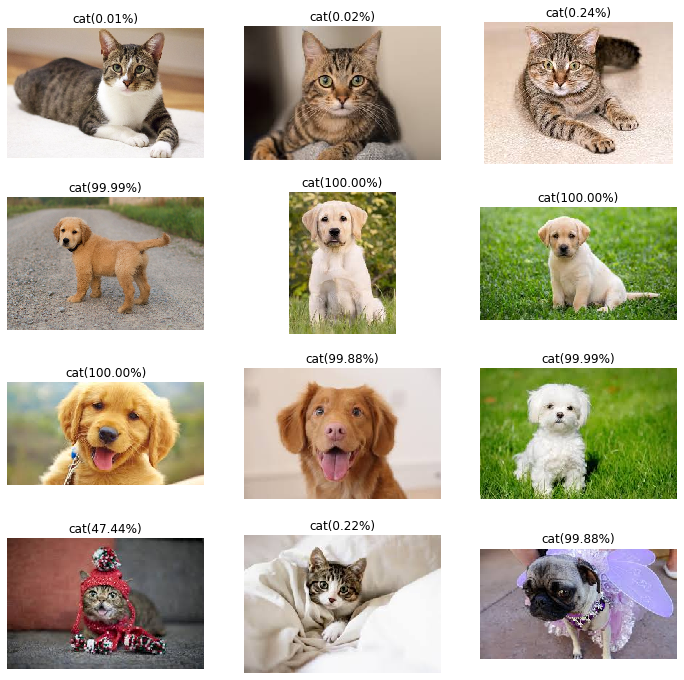

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2,glob,math,numpy as np
import matplotlib.pyplot as plt

pet_dir = 'pet/*.*'
labels = ['cat', 'dog']
IMG_SIZE = 150
model = tf.keras.models.load_model('cats_and_dogs_small_3.h5')
paths =  glob.glob(pet_dir)
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)
    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  labels[label.numpy()]
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')